<a href="https://colab.research.google.com/github/BrightonMboya/Deep_Learning-with-TensorFlow/blob/CNNs/Convolutional_Neural_Networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What we're going to cover
<br>
Specifically, we're going to go through the follow with TensorFlow:

<br>
Getting a dataset to work with
<br>
Architecture of a convolutional neural network
<br>
A quick end-to-end example (what we're working towards)
<br>
Steps in modelling for binary image classification with CNNs
<br>
Becoming one with the data
<br>
Preparing data for modelling
<br>
Creating a CNN model (starting with a baseline)
<br>
Fitting a model (getting it to find patterns in our data)
<br>
Evaluating a model
<br>
Improving a model
<br>
Making a prediction with a trained model
<br>
Steps in modelling for multi-class image classification with CNNs
<br>
Same as above (but this time with a different dataset)

## Get the data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

In [ ]:
import zipfile 

#get the data from the web
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref= zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-08-12 18:24:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  66.5MB/s    in 1.6s    

2021-08-12 18:24:11 (66.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
A `test` directory with the same structure as the train directory.

In [ ]:
# lets inspect the data which we imported
!ls pizza_steak

test  train


we can see we have `test` and `train` folder
<br>
let's see what we have inside them

In [ ]:
! ls pizza_steak/train


pizza  steak


In [ ]:
#what about the steak directory
! ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# what about the test folder
! ls pizza_steak/test/

pizza  steak


In [ ]:
! ls pizza_steak/test/steak/

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os
# walkthrough the dataset and list the number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir= pathlib.Path('pizza_steak/train/') # turns our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

🤔 Note: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize.

In [ ]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  #set up all the images in this directrory
  target_folder= target_dir + target_class

  # get a random img path
  """the below code returns a particular length list of items chosen from the 
  sequence i.e. list, tuple, string or set. Used for random sampling without 
  replacement."""
  random_image= random.sample(os.listdir(target_folder), 1)

  #read the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title('target_class')
  plt.axis('off');

  print(f"Image Shape: {img.shape}")
  #if you uncomment the line below it will return a tensor of the img
  return img

Image Shape: (512, 512, 3)


array([[[226, 215, 195],
        [227, 216, 196],
        [229, 218, 198],
        ...,
        [221, 207, 196],
        [225, 211, 200],
        [220, 206, 195]],

       [[228, 217, 197],
        [229, 218, 198],
        [229, 218, 198],
        ...,
        [221, 207, 196],
        [224, 210, 199],
        [221, 207, 196]],

       [[229, 218, 198],
        [229, 218, 198],
        [229, 218, 198],
        ...,
        [219, 205, 194],
        [223, 209, 198],
        [222, 208, 197]],

       ...,

       [[227, 213, 200],
        [230, 216, 203],
        [232, 218, 205],
        ...,
        [183, 136,  64],
        [183, 139,  66],
        [181, 137,  66]],

       [[226, 212, 199],
        [229, 215, 202],
        [231, 217, 204],
        ...,
        [181, 137,  64],
        [184, 140,  69],
        [185, 141,  70]],

       [[226, 212, 199],
        [229, 215, 202],
        [230, 216, 203],
        ...,
        [186, 142,  69],
        [189, 145,  74],
        [190, 146,  75]]

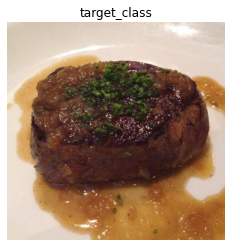

In [ ]:
view_random_image(target_dir='pizza_steak/train/',
                  target_class= 'steak')

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

## A (typical) architecture of a convolutional neural network
Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

In [ ]:
# don't freak out it's just creating a pandas data frame lol

data= {'Hyperparameter/ layer type': ['Input image(s)', 'Input_layer', 'convolution_layer', 'Hidden activation', 'pooling layer', 'fully connected layer',
                                      'output layer', 'output activation' ],
       'what does it do': ["Target images you'd like to discover patterns in", "Takes in target images and preprocesses them for further layers",
                           "Extracts/learns the most important features from target images", "Adds non-linearity to learned features (non-straight lines)",
                           "Reduces the dimensionality of learned image features", "Further refines learned features from convolution layers",
                           "Takes learned features and outputs them in shape of target labels", "Adds non-linearities to output layer"],
       'Typical values': ["Whatever you can take a photo (or video) of", "input_shape = [batch_size, image_height, image_width, color_channels]",
                          "Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)", "Usually ReLU (tf.keras.activations.relu)",
                          "Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)", 
                          "tf.keras.layers.Dense", "output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)",
                          "tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax"]}

import pandas as pd
df = pd.DataFrame(data= data)
df

,Hyperparameter/ layer type,what does it do,Typical values
0,Input image(s),Target images you'd like to discover patterns in,Whatever you can take a photo (or video) of
1,Input_layer,Takes in target images and preprocesses them f...,"input_shape = [batch_size, image_height, image..."
2,convolution_layer,Extracts/learns the most important features fr...,"Multiple, can create with tf.keras.layers.Conv..."
3,Hidden activation,Adds non-linearity to learned features (non-st...,Usually ReLU (tf.keras.activations.relu)
4,pooling layer,Reduces the dimensionality of learned image fe...,Average (tf.keras.layers.AvgPool2D) or Max (tf...
5,fully connected layer,Further refines learned features from convolut...,tf.keras.layers.Dense
6,output layer,Takes learned features and outputs them in sha...,output_shape = [number_of_classes] (e.g. 3 for...
7,output activation,Adds non-linearities to output layer,tf.keras.activations.sigmoid (binary classific...


In [ ]:
# let's render the above table using a google colab api
from google.colab import data_table
data_table.DataTable(df, include_index= False)

,Hyperparameter/ layer type,what does it do,Typical values
0,Input image(s),Target images you'd like to discover patterns in,Whatever you can take a photo (or video) of
1,Input_layer,Takes in target images and preprocesses them f...,"input_shape = [batch_size, image_height, image..."
2,convolution_layer,Extracts/learns the most important features fr...,"Multiple, can create with tf.keras.layers.Conv..."
3,Hidden activation,Adds non-linearity to learned features (non-st...,Usually ReLU (tf.keras.activations.relu)
4,pooling layer,Reduces the dimensionality of learned image fe...,Average (tf.keras.layers.AvgPool2D) or Max (tf...
5,fully connected layer,Further refines learned features from convolut...,tf.keras.layers.Dense
6,output layer,Takes learned features and outputs them in sha...,output_shape = [number_of_classes] (e.g. 3 for...
7,output activation,Adds non-linearities to output layer,tf.keras.activations.sigmoid (binary classific...


## An end-to-end example
We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

🔑 Note: A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the CNN explainer webpage.

📖 Resource: The architecture we're using below is a scaled-down version of VGG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen= ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

# setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into bathches
train_data= train_datagen.flow_from_directory(train_dir,
                                             batch_size= 32, #number of images to process at a time
                                             target_size= (224, 224), #convert all the images to a 224 by 224 pixels
                                             class_mode= 'binary', # kind of problems we're working on
                                             seed= 42)

valid_data= valid_datagen.flow_from_directory(test_dir,
                                              batch_size= 32,
                                              target_size= (224, 224),
                                              class_mode= 'binary',
                                              seed= 42)
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1= tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters= 10,
                               kernel_size= 3, # can also be (3,3)
                               activation= 'relu',
                               input_shape= (224, 224, 3)), # first layer specifies input shape (height, width, colour chanells)
         tf.keras.layers.Conv2D(10, 3, activation= "relu"),
         tf.keras.layers.MaxPool2D(pool_size= 2, #pool_size can also be (2,2))
                                   padding= 'Valid'),
         tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
         tf.keras.layers.MaxPool2D(2),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(1, activation= 'sigmoid')
        ])

#compile the model
model_1.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])
#fit the model
history_1= model_1.fit(train_data,
                       epochs= 5,
                       steps_per_epoch= len(train_data),
                       validation_data= valid_data,
                       validation_steps= len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 250ms/step - loss: 0.5706 - accuracy: 0.7153 - val_loss: 0.4682 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4736 - accuracy: 0.7793 - val_loss: 0.4565 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4368 - accuracy: 0.8073 - val_loss: 0.3960 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3860 - accuracy: 0.8240 - val_loss: 0.3489 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3444 - accuracy: 0.8540 - val_loss: 0.3367 - val_accuracy: 0.8580


🤔 Note: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

🛠 Practice: Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible CNN explainer website. What do you notice about the layer names at the top of the webpage? https://poloclub.github.io/cnn-explainer/

Since we've already fit a model, let's check out its architecture.

In [ ]:
# check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 29160)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

Now there are a few new things here we haven't discussed, namely:

The ImageDataGenerator class and the rescale parameter
* `The flow_from_directory()` method
  * The `batch_size` parameter
  * The `target_size` parameter
* `Conv2D` layers (and the parameters which come with them)
* `MaxPool2D` layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function
<br>
Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.
The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# set the random seed
tf.random.set_seed(42)

model_2= tf.keras.models.Sequential([
           tf.keras.layers.Flatten(input_shape= (224,224, 3)),
           tf.keras.layers.Dense(4, activation= 'relu'),
           tf.keras.layers.Dense(4, activation= 'relu'),
           tf.keras.layers.Dense(1, activation= 'sigmoid')
])

# compile the model
model_2.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_2= model_2.fit(train_data,
                       epochs= 5,
                       steps_per_epoch= len(train_data),
                       validation_data= valid_data,
                       validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 0.8544 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Wow. One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

🔑 Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [ ]:
# set the random seed
tf.random.set_seed(42)

#create the same model as above but this time arround increase the number of neurons in each layer
model_3= tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape= (224,224, 3)),
          tf.keras.layers.Dense(100, activation= 'relu'),
          tf.keras.layers.Dense(100, activation= 'relu'),
          tf.keras.layers.Dense(100, activation= 'relu'),  #add an additional layer
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs= 5,
                        validation_data= valid_data,
                        steps_per_epoch= len(train_data),
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 2.6937 - accuracy: 0.6327 - val_loss: 0.5973 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.8264 - accuracy: 0.7027 - val_loss: 0.6987 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.5386 - accuracy: 0.7680 - val_loss: 0.7843 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.5333 - accuracy: 0.7627 - val_loss: 0.6170 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.5887 - accuracy: 0.7547 - val_loss: 0.4860 - val_accuracy: 0.7480


Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

How does the architecute look?

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## End of Part 1 of Convolutional Neural Networks

## Binary classification: Let's break it down
We just went through a whirlwind of steps:

* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied
<br>Let's step through each.

1. Import and become one with the data
<br>Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

📖 Resource: To see how this data was processed into the file format we're using, see the preprocessing notebook.


Image Shape: (512, 341, 3)
Image Shape: (384, 512, 3)


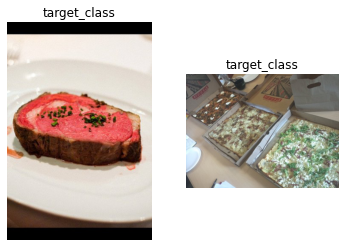

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img= view_random_image(target_dir="pizza_steak/train/", 
                             target_class="steak")
plt.subplot(1, 2, 2)
pizza_img= view_random_image("pizza_steak/train/", 'pizza')

## 2. Preprocess the data (prepare it for a model)
One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [ ]:
# defining and set training and testing data paths
train_dir= "pizza_steak/train/"
test_dir= "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [ ]:
# create a train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

🔑 Note: For more transformation options such as data augmentation (we'll see this later), refer to the ImageDataGenerator documentation.

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [ ]:
# tutn data into batches
train_data=  train_datagen.flow_from_directory(directory= train_dir,
                                               target_size= (224, 224),
                                               seed= 42,
                                               class_mode= 'binary',
                                               batch_size= 32)

test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             batch_size= 32,
                                             seed= 42,
                                             class_mode= 'binary',
                                             target_size= (224, 224))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
* The target_size parameter defines the input size of our images in (height, width) format.
* The class_mode value of 'binary' defines our classification problem type. If * we had more than two classes, we would use 'categorical'.
* The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.
* We can take a look at our batched images and labels by inspecting the train_data object.

In [ ]:
# get the sample of the training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

Wonderful, it seems our images and labels are in batches of 32.

Let's see what the images look like.

In [ ]:
# get the first two images
images[: 2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

Due to our rescale parameter, the images are now in (224, 224, 3) shape tensors with values between 0 and 1.

How about the labels?

In [ ]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

## 3. Create a model (start with a baseline)
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

🔑 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [ ]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create the model (this can be our baseline, a 3 layer CNN)
model_4= Sequential([
          Conv2D(filters= 10,
                 kernel_size= 3,
                 strides= 1,
                 padding= 'valid',
                 activation= 'relu',
                 input_shape= (224, 224, 3)), #input layer (specify input shape)
          Conv2D(10, 3, activation= 'relu'),
          Conv2D(10, 3, activation= 'relu'),
          Flatten(),
          Dense(1, activation= 'sigmoid') #output layer (specify output shape)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:

* The `"2D"` means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* `padding` - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

For more explanation on CNNs visit this link https://poloclub.github.io/cnn-explainer/

In [ ]:
# compile the model
model_4.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics= ['accuracy'])

## 4. Fit a model
Our model is compiled, time to fit it.

You'll notice two new parameters here:

* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
history_4 = model_4.fit(train_data, epochs= 4,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/4
47/47 [==============================] - 12s 244ms/step - loss: 1.2277 - accuracy: 0.6760 - val_loss: 0.4521 - val_accuracy: 0.8060
Epoch 2/4
47/47 [==============================] - 11s 239ms/step - loss: 0.4478 - accuracy: 0.8080 - val_loss: 0.4107 - val_accuracy: 0.8340
Epoch 3/4
47/47 [==============================] - 11s 244ms/step - loss: 0.3579 - accuracy: 0.8453 - val_loss: 0.4573 - val_accuracy: 0.7820
Epoch 4/4
47/47 [==============================] - 11s 241ms/step - loss: 0.1913 - accuracy: 0.9360 - val_loss: 0.4184 - val_accuracy: 0.8180


## 5. Evaluate the model
Oh yeah! Looks like our model is learning something.

Let's check out its training curves.

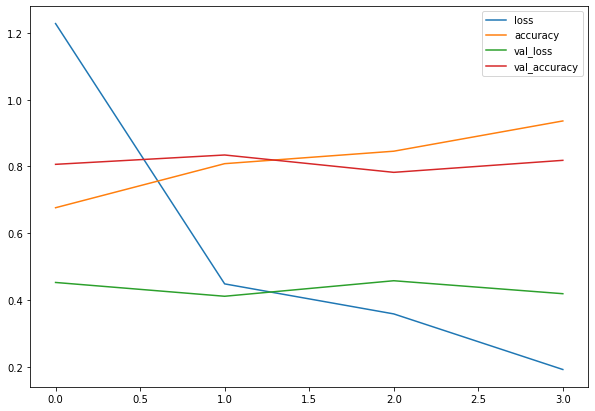

In [ ]:
pd.DataFrame(history_4.history).plot(figsize= (10,7))

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves

In [ ]:
# plot the validation and training losses seperately
def plot_loss_curves(history):
  loss= history.history['loss']
  val_loss= history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epoch= range(len(history.history['loss']))

  plt.plot(epoch, loss, label= 'training_loss')
  plt.plot(epoch, val_loss, label= 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend();
  
  plt.figure()
  plt.plot(epoch, accuracy, label= 'training_accuracy')
  plt.plot(epoch, val_accuracy, label= 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend();

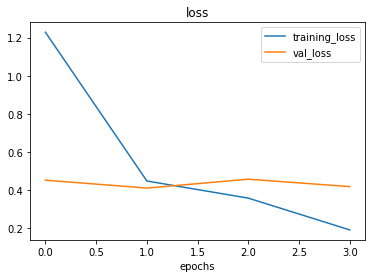

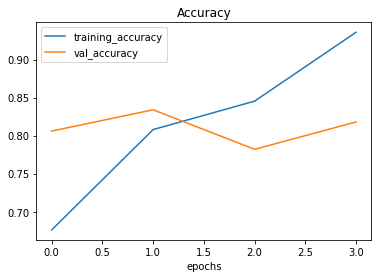

In [ ]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters
Fitting a machine learning model comes in 3 steps:

1. Create a basline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation
For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output


Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer

In [ ]:
model_5 = Sequential([
        Conv2D(10, 3, activation= 'relu', input_shape= (224, 224, 3)),
               MaxPool2D(pool_size=2), #reduce the number of featres by half
               Conv2D(10,3, activation= 'relu'),
               MaxPool2D(),
               Conv2D(10, 3, activation= 'relu'),
               MaxPool2D(),
               Flatten(),
               Dense(1, activation= 'sigmoid')
])

In [ ]:
model_5.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics= ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data, epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 0.5976 - accuracy: 0.6727 - val_loss: 0.5073 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4617 - accuracy: 0.7920 - val_loss: 0.3810 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4112 - accuracy: 0.8153 - val_loss: 0.3760 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3955 - accuracy: 0.8253 - val_loss: 0.3308 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3878 - accuracy: 0.8313 - val_loss: 0.3720 - val_accuracy: 0.8300


Okay, it looks like our model with max pooling (model_5) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves.

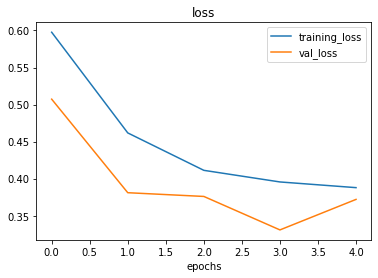

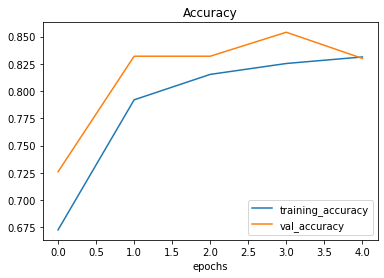

In [ ]:
# plot the loss curves
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range= 20, # rotate the image slightly btn 0 and 20 degrees (note: this is an int not a float)
                                             shear_range= 0.2, 
                                             zoom_range= 0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range= 0.2,
                                             horizontal_flip = True)

# create ImageDataGenerator training instance without Data augmentation
train_datagen= ImageDataGenerator(rescale= 1/255.)

#create ImageDataGenerator test instances without data augmentation
test_datagen = ImageDataGenerator(rescale= 1/255.)

🤔 Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from the training directory
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size= (224,224),
                                                                  batch_size= 32,
                                                                  class_mode= 'binary',
                                                                  shuffle= False)

# create non-augmented data batches
print('NOn-augmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224, 224),
                                               batch_size= 32,
                                               shuffle= False,
                                               class_mode= 'binary')

print('Unchanged test images')
test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size= (224, 224),
                                            class_mode= 'binary',
                                            batch_size= 32)

Found 1500 images belonging to 2 classes.
NOn-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images
Found 500 images belonging to 2 classes.


Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #lables aren't augmented they remaining the same

(-0.5, 223.5, 223.5, -0.5)

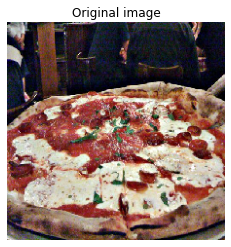

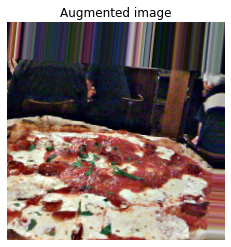

In [ ]:
# show original image and augmented image
import random
random_number = random.randint(1, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

🤔 Question: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.

In [ ]:
# create the model (same as model_5)
model_6= Sequential([
      Conv2D(10,3, activation= 'relu', input_shape= (224,224, 3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Conv2D(10, 3, activation= 'relu'),
      Flatten(),
      Dense(1, activation='sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer= Adam(),
                metrics= ['accuracy'])

history_6= model_6.fit(train_data_augmented,
              epochs= 5,
              steps_per_epoch= len(train_data_augmented),
              validation_data= test_data,
              validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 524ms/step - loss: 0.7157 - accuracy: 0.5287 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 522ms/step - loss: 0.7146 - accuracy: 0.5227 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.7080 - accuracy: 0.5007 - val_loss: 0.6903 - val_accuracy: 0.6080
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6923 - accuracy: 0.5213 - val_loss: 0.6836 - val_accuracy: 0.5460
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6856 - accuracy: 0.5627 - val_loss: 0.6636 - val_accuracy: 0.5680


🤔 Question: Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

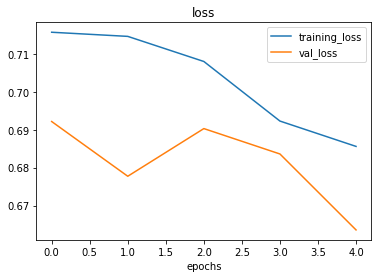

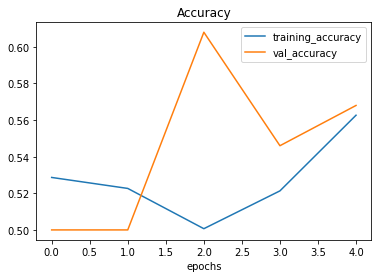

In [ ]:
plot_loss_curves(history_6)

It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Let's see what happens when we shuffle the augmented training data.

In [ ]:
# import data and augment it from directories
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'binary',
    shuffle= True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
                      Conv2D(10, 3, input_shape= (224, 224, 3), activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')

])

model_7.compile(loss= 'binary_crossentropy',
                metrics= ['accuracy'],
                optimizer= Adam())

history_7 = model_7.fit(train_data_augmented_shuffled,
                        steps_per_epoch= len(train_data_augmented_shuffled),
                        epochs= 5,
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 536ms/step - loss: 0.6566 - accuracy: 0.5947 - val_loss: 0.5389 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5621 - accuracy: 0.7213 - val_loss: 0.4518 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5440 - accuracy: 0.7267 - val_loss: 0.4010 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5155 - accuracy: 0.7467 - val_loss: 0.3881 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4696 - accuracy: 0.7793 - val_loss: 0.3846 - val_accuracy: 0.8180


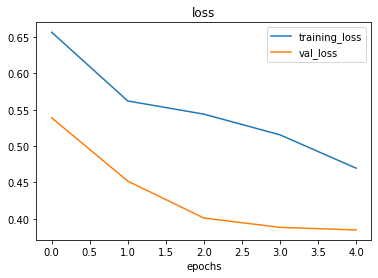

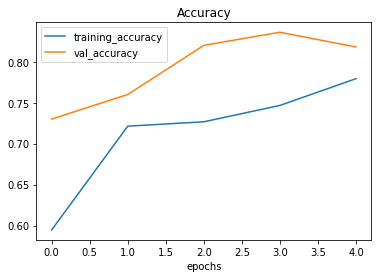

In [ ]:
plot_loss_curves(history_7)

Notice with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).

### 7. Repeat until satisified
We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

Increase the number of model layers (e.g. add more convolutional layers).
Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
Train for longer (more epochs).
Finding an ideal learning rate.
Get more data (give the model more opportunities to learn).
Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer). -> https://poloclub.github.io/cnn-explainer/

## Making a prediction with our trained model
What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [ ]:
#classes we're working with
print(class_names)

['.DS_Store' 'pizza' 'steak']


--2021-08-12 19:51:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-08-12 19:51:08 (26.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



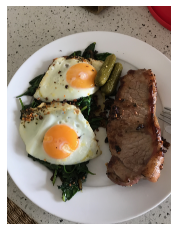

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
#check the shape of the image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05